<ipython-input-14-84fc9ca7824b>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_temperature = pd.read_table("https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-w0-2000m.dat", delim_whitespace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

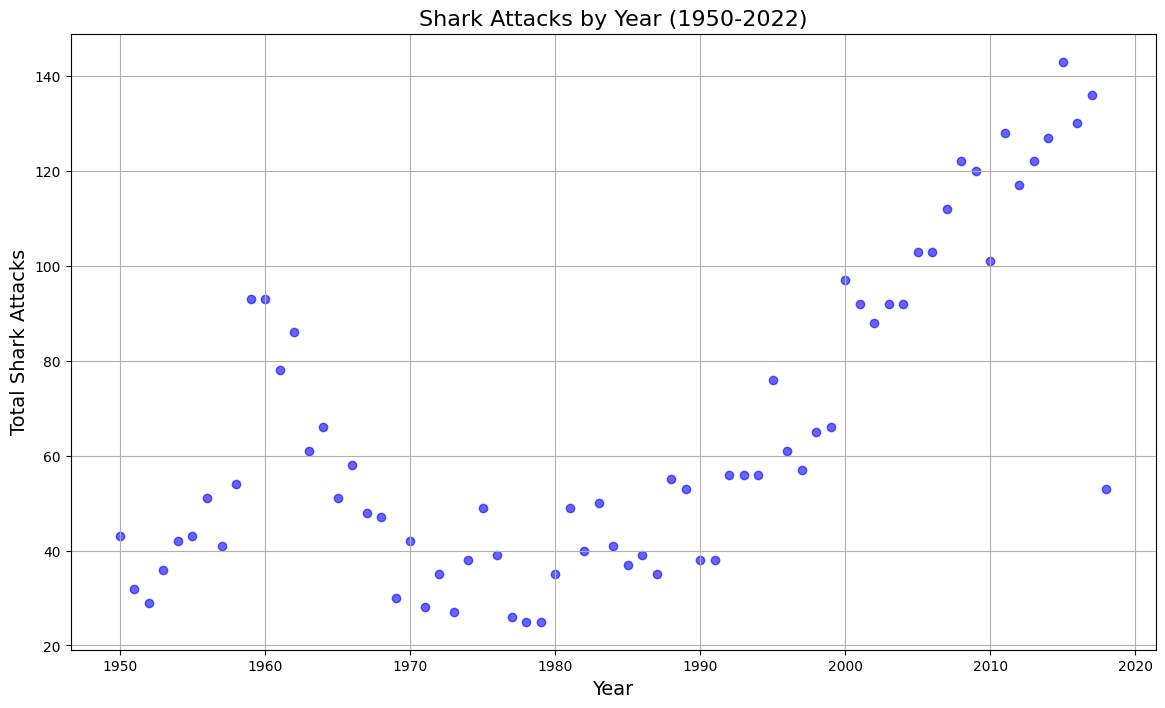

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Verileri oku
data_shark = pd.read_csv("https://raw.githubusercontent.com/bekircan4721/Bekircan_arac-/main/attacks.csv", encoding="unicode_escape")  # veya "ISO-8859-1"
data_temperature = pd.read_table("https://www.ncei.noaa.gov/data/oceans/woa/DATA_ANALYSIS/3M_HEAT_CONTENT/DATA/basin/pentad/pent_h22-w0-2000m.dat", delim_whitespace=True)

# Verinin yapısını kontrol et
print(data_shark.info())

# calulating yearly shark attacks
# first we have to clean empty rows in year
data_shark_cleaned = data_shark.dropna(subset=['Year'])

attack_counts_by_year = data_shark_cleaned.groupby('Year').size()  # Her yıl için toplam saldırıyı say

# filtering years between 1950-1922 because the temperature dataset only have this range.
attack_counts_by_year_filtered = attack_counts_by_year[(attack_counts_by_year.index >= 1950) & (attack_counts_by_year.index <= 2022)]

# Scatterplot
plt.figure(figsize=(14, 8))
plt.scatter(attack_counts_by_year_filtered.index, attack_counts_by_year_filtered.values, color='blue', alpha=0.6)

plt.title('Shark Attacks by Year (1950-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Shark Attacks', fontsize=14)
plt.grid(True)  # Grid
plt.show()
